In [1]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

import seaborn as sns

import matplotlib.pyplot as plt

import pandas as pd

import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,MinMaxScaler,StandardScaler

import datetime

from scipy.stats import shapiro, normaltest, kstest

import scipy.stats as sts

import statsmodels.api as sm

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# 1 Problem Statement

In [2]:


'Predict Price of flats using different Independent Variables'

'Predict Price of flats using different Independent Variables'

# 2 Data Gathering

In [3]:
df = pd.read_csv('Pune_House_Data.csv')

In [4]:
df.shape

(13320, 9)

In [5]:
# df.head()

In [6]:
#Getting to know how many non null values are present in each column and dtype of that column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
#stats of numeric column

df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


# 3 EDA: Exploratory Data Analysis

### 3.1 Getting idea about how many null values are present in each

In [8]:
# Getting idea about how many null values are present in each
df.isna().sum()

area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

In [9]:
df.isna().mean()*100

area_type         0.000000
availability      0.000000
size              0.120120
society          41.306306
total_sqft        0.000000
bath              0.548048
balcony           4.572072
price             0.000000
site_location     0.007508
dtype: float64

In [10]:
# sns.heatmap(df.isna())

In [11]:
((df.isna().sum())/(df.shape[0]))*100

area_type         0.000000
availability      0.000000
size              0.120120
society          41.306306
total_sqft        0.000000
bath              0.548048
balcony           4.572072
price             0.000000
site_location     0.007508
dtype: float64

In [12]:
df.drop("society",axis=1,inplace=True)  ##droping bcoz more than 30% data is missing

### To see how many unique values and their count in each column

In [13]:
# To see how many unique values and their count in each column

# for i in df.columns.tolist():
#   print(df[i].value_counts().reset_index())
#   print()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   total_sqft     13320 non-null  object 
 4   bath           13247 non-null  float64
 5   balcony        12711 non-null  float64
 6   price          13320 non-null  float64
 7   site_location  13319 non-null  object 
dtypes: float64(3), object(5)
memory usage: 832.6+ KB


In [16]:
# Lets see corr between each variable with each other, now will get it for only 3 columns because other columns are in object format 

# sns.heatmap(df.corr(),annot=True)

In [17]:
df1=df.copy()

In [18]:
df1.head(2)

,area_type,availability,size,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk


In [19]:
df.isna().mean()*100

area_type        0.000000
availability     0.000000
size             0.120120
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
site_location    0.007508
dtype: float64

### 3.2 area_type

In [13]:
df1["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [18]:
df1=pd.get_dummies(df1,columns=["area_type"],drop_first=True)

In [15]:
df1.head(2)

,availability,size,total_sqft,bath,balcony,price,site_location,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,19-Dec,2 BHK,1056,2.0,1.0,39.07,Alandi Road,0,0,1
1,Ready To Move,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk,0,1,0


### 3.3 availability

In [22]:
df1["availability"].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
14-Jul               1
16-Jan               1
15-Dec               1
14-Nov               1
16-Jul               1
Name: availability, Length: 81, dtype: int64

In [23]:
#In Availability column we have date in string format without year, we can convert it into date time and then convert it into numerical value


In [24]:
df1['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [19]:
df1['availability'] = df1['availability'].apply(lambda x: x + '-2021')

In [21]:
# df1['availability'].unique()

In [22]:
import datetime

In [23]:
current_date =datetime.datetime(2022, 1, 1).date()
df1['availability'].replace({'Ready To Move-2021':'1-Jan-2021','Immediate Possession-2021':'1-Jan-2021'},inplace=True)


In [25]:
# df1['availability'].unique()

In [26]:
df2=df1.copy()

In [27]:
df2["availability"] =df2["availability"].apply(lambda x :abs((datetime.datetime.strptime(x,"%d-%b-%Y").date())-current_date).days)

In [28]:
df2.head()

,availability,size,total_sqft,bath,balcony,price,site_location,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,13,2 BHK,1056,2.0,1.0,39.07,Alandi Road,0,0,1
1,365,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk,0,1,0
2,365,3 BHK,1440,2.0,3.0,62.00,Anandnagar,0,0,0
3,365,3 BHK,1521,3.0,1.0,95.00,Aundh,0,0,1
4,365,2 BHK,1200,2.0,1.0,51.00,Aundh Road,0,0,1


In [29]:
df3=df2.copy()

### 3.4 size

In [30]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [31]:
df3[["First","Second"]] =df3["size"].str.split(expand=True)

In [32]:
df3.head()

,availability,size,total_sqft,bath,balcony,price,site_location,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,First,Second
0,13,2 BHK,1056,2.0,1.0,39.07,Alandi Road,0,0,1,2,BHK
1,365,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk,0,1,0,4,Bedroom
2,365,3 BHK,1440,2.0,3.0,62.00,Anandnagar,0,0,0,3,BHK
3,365,3 BHK,1521,3.0,1.0,95.00,Aundh,0,0,1,3,BHK
4,365,2 BHK,1200,2.0,1.0,51.00,Aundh Road,0,0,1,2,BHK


In [33]:
# df3= pd.get_dummies(df3,columns=["Second"])
# df3.head()

In [34]:
# df3.info()

In [35]:
df3.drop("size",axis=1,inplace=True) 

In [36]:
df4=df3.copy()

In [37]:
df4.head()

,availability,total_sqft,bath,balcony,price,site_location,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,First,Second
0,13,1056,2.0,1.0,39.07,Alandi Road,0,0,1,2,BHK
1,365,2600,5.0,3.0,120.00,Ambegaon Budruk,0,1,0,4,Bedroom
2,365,1440,2.0,3.0,62.00,Anandnagar,0,0,0,3,BHK
3,365,1521,3.0,1.0,95.00,Aundh,0,0,1,3,BHK
4,365,1200,2.0,1.0,51.00,Aundh Road,0,0,1,2,BHK


### 3.5 total_sqft

In [38]:
df4["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [39]:
import re

def clean(s):
    pattern = re.compile(r"[\d.]+")
    try:
        s = float(s)
        
    except (ValueError):
        if s.find("-") !=-1:
            s=np.mean([float(i) for i in s.split("-")])
        elif s.endswith('Sq. Meter'):
            s = float(pattern.search(s)[0])*10.7639
        elif s.endswith('Perch'):
            s = float(pattern.search(s)[0])*0.00367309
        elif s.endswith('Sq. Yards'):
            s = float(pattern.search(s)[0])*9
        elif s.endswith('Guntha'):
            s = float(pattern.search(s)[0])*1089
        elif s.endswith('Acres'):
            s = float(pattern.search(s)[0])*43560
        elif s.endswith('ents'):
            s = float(pattern.search(s)[0])*435.56
        elif s.endswith('Grounds'):
            s = float(pattern.search(s)[0]) *2400 
    return s
            

In [40]:
df4["total_sqft"] = df4["total_sqft"].apply(clean)

In [41]:
df4["total_sqft"] = df4["total_sqft"].astype(int)

In [42]:
df4.head(2)

,availability,total_sqft,bath,balcony,price,site_location,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,First,Second
0,13,1056,2.0,1.0,39.07,Alandi Road,0,0,1,2,BHK
1,365,2600,5.0,3.0,120.00,Ambegaon Budruk,0,1,0,4,Bedroom


### 3.6 site_location

In [43]:
dummies = pd.get_dummies(df4["site_location"])
dummies.head(3)

,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df4 =pd.concat([df4,dummies],axis="columns")
df4

,availability,total_sqft,bath,balcony,price,site_location,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,First,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,13,1056,2.0,1.0,39.07,Alandi Road,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
1,365,2600,5.0,3.0,120.00,Ambegaon Budruk,0,1,0,4,...,0,0,0,0,0,0,0,0,0,0
2,365,1440,2.0,3.0,62.00,Anandnagar,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,365,1521,3.0,1.0,95.00,Aundh,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0
4,365,1200,2.0,1.0,51.00,Aundh Road,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,365,3453,4.0,0.0,231.00,Pashan,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
13316,365,3600,5.0,NaN,400.00,Paud Road,0,0,1,4,...,0,0,0,0,0,0,0,0,0,0
13317,365,1141,2.0,1.0,60.00,Pirangut,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
13318,197,4689,4.0,1.0,488.00,Prabhat Road,0,0,1,4,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df4.drop("site_location",axis=1,inplace=True)

In [46]:
df5=df4.copy()

In [47]:
df5.head(2)

,availability,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,First,Second,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,13,1056,2.0,1.0,39.07,0,0,1,2,BHK,...,0,0,0,0,0,0,0,0,0,0
1,365,2600,5.0,3.0,120.00,0,1,0,4,Bedroom,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# df5[df5.duplicated()]  ## check duplicated rows 

In [48]:
df5.isna().mean()*100

availability    0.000000
total_sqft      0.000000
bath            0.548048
balcony         4.572072
price           0.000000
                  ...   
Wakadewadi      0.000000
Wanowrie        0.000000
Warje           0.000000
Yerawada        0.000000
other           0.000000
Length: 107, dtype: float64

In [49]:
df6=df5.copy()

# 4) Feature Engineering`

In [51]:
# df6.isna().sum()

In [53]:
# (df6.isna().sum()/df6.shape[0] )*100

In [54]:
# sns.heatmap(df6.isna(),cmap="YlGnBu")

### 4.1 availability

In [57]:
# df6["availability"].value_counts()

In [58]:
df6["availability"].dtype

dtype('int64')

C:\Users\SHIVANSH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='availability'>

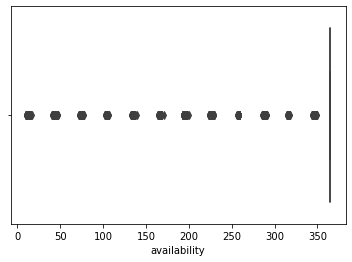

In [59]:
sns.boxplot(df6["availability"])  ## visualize the outliers

<AxesSubplot:>

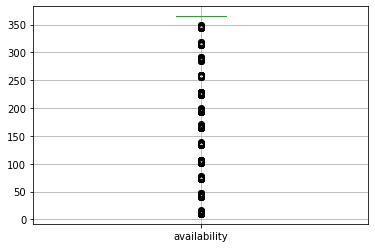

In [60]:
df6.boxplot(column=["availability"])

In [61]:
df6.shape

(13320, 107)

In [40]:
## z_score
from scipy import stats
z_score= abs(stats.zscore(df6["availability"]))
outbox = np.where(z_score>3)
df6.iloc[outbox]

,availability,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,First,Second,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,13,1056,2.0,1.0,39.07,0,0,1,2,BHK,...,0,0,0,0,0,0,0,0,0,0
21,13,1755,3.0,1.0,122.00,0,0,1,3,BHK,...,0,0,0,0,0,0,0,0,0,0
27,12,1610,3.0,2.0,81.00,0,0,0,3,BHK,...,0,0,0,0,0,0,0,0,0,0
30,13,2475,4.0,0.0,186.00,0,0,1,4,BHK,...,0,0,0,0,0,0,0,0,0,0
35,11,700,2.0,1.0,36.00,0,0,1,2,BHK,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13255,13,1146,2.0,1.0,69.00,0,0,1,2,BHK,...,0,0,0,0,0,0,0,0,0,0
13258,13,877,1.0,1.0,59.00,0,0,1,1,BHK,...,0,0,0,0,0,0,0,0,0,0
13259,13,1477,2.0,1.0,69.50,0,0,1,3,BHK,...,0,0,0,0,0,0,0,0,0,0
13266,12,1665,3.0,2.0,71.58,0,0,1,3,BHK,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df6.describe()

,availability,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,Alandi Road,Ambegaon Budruk,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
count,13320.000000,1.332000e+04,13247.000000,12711.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,...,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000
mean,322.556757,1.827275e+03,2.692610,1.584376,112.565627,0.006532,0.152027,0.659910,0.010435,0.010435,...,0.010360,0.010360,0.010360,0.010360,0.010360,0.010360,0.010360,0.010360,0.010360,0.000075
std,97.339105,1.428667e+04,1.341458,0.817263,148.971674,0.080557,0.359061,0.473757,0.101623,0.101623,...,0.101261,0.101261,0.101261,0.101261,0.101261,0.101261,0.101261,0.101261,0.101261,0.008665
min,10.000000,1.000000e+00,1.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.000000,1.100000e+03,2.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,365.000000,1.277000e+03,2.000000,2.000000,72.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,365.000000,1.680000e+03,3.000000,2.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,365.000000,1.306800e+06,40.000000,3.000000,3600.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
## IQR
q1 =df6["availability"].quantile(0.25)
q3 =df6["availability"].quantile(0.75)
iqr =q3-q1
upper_tail =q3+3*iqr
lower_tail =q1-3*iqr
print(upper_tail)
print(lower_tail)
print(iqr)

365.0
365.0
0.0


In [56]:
df6.loc[df6["availability"]<upper_tail,"availability"].mean()

157.3819316929857

In [57]:
df6["availability"].loc[df6["availability"]>upper_tail] 

Series([], Name: availability, dtype: int64)

In [58]:
## normalize
from sklearn.preprocessing import MinMaxScaler, StandardScaler
normal_scalar =MinMaxScaler()
availabilty = normal_scalar.fit_transform(df6[["availability"]])
df6["availability"] =pd.DataFrame(availabilty,columns=["availability"])
df6["availability"]

0        0.008451
1        1.000000
2        1.000000
3        1.000000
4        1.000000
           ...   
13315    1.000000
13316    1.000000
13317    1.000000
13318    0.526761
13319    1.000000
Name: availability, Length: 13320, dtype: float64

In [68]:
df6.describe()

,availability,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,Alandi Road,Ambegaon Budruk,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
count,13320.000000,1.332000e+04,13247.000000,12711.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,...,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000
mean,0.880442,1.827275e+03,2.692610,1.584376,112.565627,0.006532,0.152027,0.659910,0.010435,0.010435,...,0.010360,0.010360,0.010360,0.010360,0.010360,0.010360,0.010360,0.010360,0.010360,0.000075
std,0.274195,1.428667e+04,1.341458,0.817263,148.971674,0.080557,0.359061,0.473757,0.101623,0.101623,...,0.101261,0.101261,0.101261,0.101261,0.101261,0.101261,0.101261,0.101261,0.101261,0.008665
min,0.000000,1.000000e+00,1.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.100000e+03,2.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.277000e+03,2.000000,2.000000,72.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.680000e+03,3.000000,2.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.306800e+06,40.000000,3.000000,3600.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\SHIVANSH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='availability'>

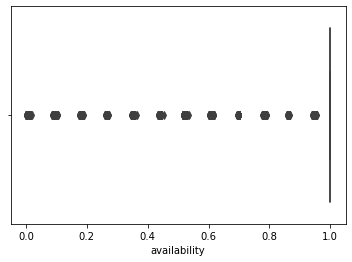

In [69]:
sns.boxplot(df6["availability"])

### 4.2 total_sqft	

C:\Users\SHIVANSH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_sqft'>

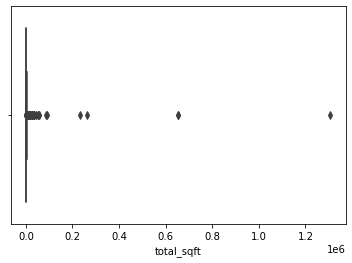

In [70]:
sns.boxplot(df6["total_sqft"])

In [59]:
## z_score
from scipy import stats
z_score= abs(stats.zscore(df6["total_sqft"]))
outbox = np.where(z_score>3)  ## return extrem outliers dataframe
df6.iloc[outbox]
# outbox
# z_score

,availability,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,First,Second,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
1019,0.785915,231303,1.0,0.0,110.0,0,1,0,1,Bedroom,...,0,0,0,0,0,0,0,0,0,0
1086,0.783099,1306800,2.0,2.0,29.5,0,1,0,2,Bedroom,...,0,0,0,0,0,0,0,0,0,0
1894,1.000000,52272,2.0,1.0,140.0,0,1,0,3,Bedroom,...,0,0,0,0,0,0,0,0,0,0
6333,1.000000,91040,2.0,0.0,200.0,0,1,0,2,Bedroom,...,0,0,0,0,0,1,0,0,0,0
7001,1.000000,653340,6.0,2.0,290.0,0,1,0,8,Bedroom,...,0,0,0,1,0,0,0,0,0,0
7334,1.000000,87120,1.0,0.0,125.0,0,1,0,1,Bedroom,...,0,0,0,0,0,0,0,0,0,0
7607,1.000000,653400,3.0,1.0,217.0,0,1,0,3,Bedroom,...,0,0,0,0,0,0,0,0,0,0
7726,1.000000,54885,1.0,0.0,125.0,0,1,0,1,Bedroom,...,0,0,0,0,0,0,0,0,0,0
10488,1.000000,54450,2.0,2.0,200.0,0,1,0,2,Bedroom,...,0,0,0,0,0,0,0,0,0,0
11615,1.000000,261360,2.0,0.0,80.0,0,1,0,3,Bedroom,...,0,0,0,0,0,0,0,1,0,0


In [60]:
# z_score= abs(stats.zscore(df6["total_sqft"]))
outbox_new = np.where(z_score<3)  ## return otherthan outliers dataframe
df6["total_sqft"].iloc[outbox_new].mean()

1569.7473328324568

In [61]:
## imputation
df6["total_sqft"].iloc[outbox] = df6["total_sqft"].iloc[outbox_new].mean()

C:\Users\SHIVANSH\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


C:\Users\SHIVANSH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_sqft'>

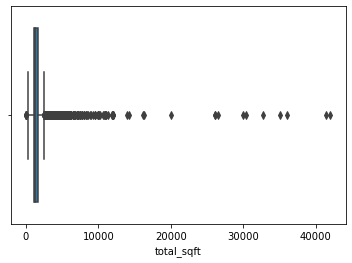

In [62]:
sns.boxplot(df6["total_sqft"])

<AxesSubplot:xlabel='total_sqft', ylabel='Density'>

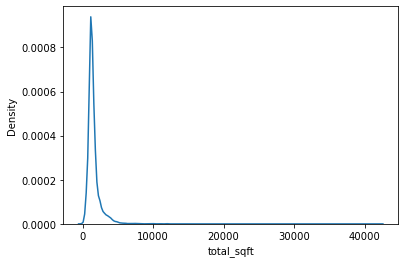

In [75]:
sns.kdeplot(df6["total_sqft"])

C:\Users\SHIVANSH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_sqft'>

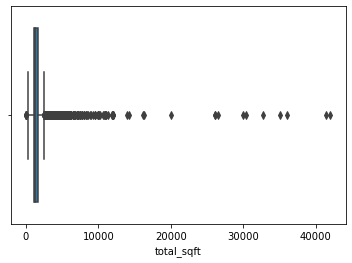

In [68]:
sns.boxplot(df6["total_sqft"])

In [78]:
df6.describe()

,availability,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,Alandi Road,Ambegaon Budruk,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
count,13320.000000,13320.000000,13247.000000,12711.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,...,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000
mean,0.880442,1569.747333,2.692610,1.584376,112.565627,0.006532,0.152027,0.659910,0.010435,0.010435,...,0.010360,0.010360,0.010360,0.010360,0.010360,0.010360,0.010360,0.010360,0.010360,0.000075
std,0.274195,1293.790889,1.341458,0.817263,148.971674,0.080557,0.359061,0.473757,0.101623,0.101623,...,0.101261,0.101261,0.101261,0.101261,0.101261,0.101261,0.101261,0.101261,0.101261,0.008665
min,0.000000,1.000000,1.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1100.000000,2.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1277.000000,2.000000,2.000000,72.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1680.000000,3.000000,2.000000,120.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,42000.000000,40.000000,3.000000,3600.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
# df6.iloc[1086]  ## cross checking with old dataset

In [63]:
## IQR
q1 =df6["total_sqft"].quantile(0.25)
q3 =df6["total_sqft"].quantile(0.75)
iqr =q3-q1
upper_tail =q3+3*iqr
lower_tail =q1-3*iqr
print(upper_tail)
print(lower_tail)
print(iqr)

3420.0
-640.0
580.0


In [462]:
# df6.loc[df6["total_sqft"]>upper_tail]

In [72]:
df6.head(2)

,availability,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,First,Second,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,0.008451,1056.0,2.0,1.0,39.07,0,0,1,2,BHK,...,0,0,0,0,0,0,0,0,0,0
1,1.000000,2600.0,5.0,3.0,120.00,0,1,0,4,Bedroom,...,0,0,0,0,0,0,0,0,0,0


In [66]:
df7=df6.copy()

### 4.3 bath

In [67]:
df7.isna().mean()*100

availability    0.000000
total_sqft      0.000000
bath            0.548048
balcony         4.572072
price           0.000000
                  ...   
Wakadewadi      0.000000
Wanowrie        0.000000
Warje           0.000000
Yerawada        0.000000
other           0.000000
Length: 107, dtype: float64

In [68]:
df7.drop("Second",axis=1,inplace=True)

In [64]:
# df7.columns

In [69]:
df8 = df7.copy()

# Imputer

In [128]:
from sklearn.impute import KNNImputer
imput =KNNImputer(n_neighbors=5)
df8 = imput.fit_transform(df8)

In [129]:
df8 =pd.DataFrame(df8,columns=df7.columns)
df8.head()

,availability,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,First,Alandi Road,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,0.008451,1056.0,2.0,1.0,39.07,0.0,0.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,2600.0,5.0,3.0,120.00,0.0,1.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,1440.0,2.0,3.0,62.00,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,1521.0,3.0,1.0,95.00,0.0,0.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,1200.0,2.0,1.0,51.00,0.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
df8.isna().mean()

availability    0.0
total_sqft      0.0
bath            0.0
balcony         0.0
price           0.0
               ... 
Wakadewadi      0.0
Wanowrie        0.0
Warje           0.0
Yerawada        0.0
other           0.0
Length: 106, dtype: float64

In [131]:
df8["bath"] =df8["bath"].astype(float)

In [132]:
## outliers detection
z_score_bath =abs(stats.zscore(df8["bath"]))
out_box = np.where(z_score_bath >3)
df8["bath"].iloc[out_box]
# out_box

9        6.0
79       6.0
89       6.0
170      6.0
209      6.0
        ... 
13119    6.0
13180    6.0
13200    6.0
13208    6.0
13300    6.0
Name: bath, Length: 273, dtype: float64

In [133]:
out_box_new = np.where(z_score_bath <3)
df8["bath"].iloc[out_box_new].mean()

2.5165845689660933

In [134]:
df8["bath"].iloc[out_box] = df8["bath"].iloc[out_box_new].mean()

In [135]:
# df7.iloc[1019]

In [136]:
df8["balcony"] =df8["balcony"].astype(int)

In [137]:
## outliers detection
z_score_bath =abs(stats.zscore(df8["balcony"]))
out_box = np.where(z_score_bath >3)
df8["balcony"].iloc[out_box]
# out_box

Series([], Name: balcony, dtype: int32)

In [138]:
df9 =df8.copy()

In [139]:
# df8["BHK"] =df8["Second"].apply(lambda x:1 if x == "BHK" else 0)
# df8["Bedroom"] =df8["Second"].apply(lambda x:1 if x == "Bedroom" else 0)
# df8["Rk"] =df8["Second"].apply(lambda x:1 if x == "Rk" else 0)

In [140]:
df9["First"] =df9["First"].astype(float)

In [141]:
df8["First"].dtype

dtype('float64')

In [142]:
# df8["BHK"] =df8["First"] * df8["BHK"]
# df8["Bedroom"] =df8["First"] * df8["Bedroom"]
# df8["Rk"] =df8["First"] * df8["Rk"]

In [143]:
# df8.drop("First",axis=1,inplace=True)

In [144]:
# df8.drop("Second",axis=1,inplace=True)

In [145]:
df9.head(2)

,availability,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,First,Alandi Road,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,0.008451,1056.0,2.0,1,39.07,0.0,0.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,2600.0,5.0,3,120.00,0.0,1.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
# df9.isna().sum()

In [147]:
df9.loc[df9["First"].isna()].head()

,availability,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,First,Alandi Road,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other


In [148]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Columns: 106 entries, availability to other
dtypes: float64(105), int32(1)
memory usage: 10.7 MB


In [149]:
df10 =df9.copy()

In [150]:
# df9.shape

In [151]:
df10.head()

,availability,total_sqft,bath,balcony,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,First,Alandi Road,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,0.008451,1056.0,2.0,1,39.07,0.0,0.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,2600.0,5.0,3,120.00,0.0,1.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,1440.0,2.0,3,62.00,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,1521.0,3.0,1,95.00,0.0,0.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,1200.0,2.0,1,51.00,0.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
from sklearn.preprocessing import Normalizer,StandardScaler

# 1) Normalization

In [153]:
x =["total_sqft","bath","balcony","First"]

In [154]:
normal =MinMaxScaler()
normal_scale =normal.fit_transform(df9[x])
normal_scale_df = pd.DataFrame(normal_scale,columns=x)
# normal_scale_df

In [155]:
df10.drop(x,axis=1,inplace =True)
df10 = pd.concat([normal_scale_df,df10],axis=1)
df10.head(1)

,total_sqft,bath,balcony,First,availability,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,Alandi Road,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,0.02512,0.25,0.333333,0.02381,0.008451,39.07,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2) Standardization

In [156]:
df10_s =df9.copy()

In [157]:
x =["total_sqft","bath","balcony","First"]

In [158]:
std =StandardScaler()
std_scale =std.fit_transform(df10_s[x])
std_scale_df = pd.DataFrame(std_scale,columns=x)
# std_scale_df

In [159]:
df10_s.drop(x,axis=1,inplace =True)
df10_s = pd.concat([std_scale_df,df10_s],axis=1)
df10_s.head(1)

,total_sqft,bath,balcony,First,availability,price,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,Alandi Road,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,-0.397102,-0.583104,-0.713106,-0.621265,0.008451,39.07,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 5) Feature selection

### 5.1)  Normalization


In [160]:
x= df10.drop(["price"],axis=1)
y=df10["price"]


In [161]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# 6) Model Building

In [162]:
lr_model =LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [163]:
# Test Data
y_pred = lr_model.predict(x_test) 



mse = mean_squared_error(y_test, y_pred)
print("Mean squared value is ",mse)
rmse = np.sqrt(mse)
print("Root Mean Squared error is :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error is ",mae)
# del r2_score
r2score = r2_score(y_test, y_pred)
print("R2 score is :",r2score)


# Train Data

y_pred_train = lr_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean squared Error on Training data is ",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared error is :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error on Training data is ",mae)

r2score = r2_score(y_train, y_pred_train)
print("R2 score on Training data is :",r2score)

Mean squared value is  11893.27666080481
Root Mean Squared error is : 109.05630041774207
Mean Absolute Error is  44.95938222887771
R2 score is : 0.44138205432234934
Mean squared Error on Training data is  13673.683749086831
Root Mean Squared error is : 116.93452761732452
Mean Absolute Error on Training data is  46.78141537131594
R2 score on Training data is : 0.3899835095815557


# KNN

In [164]:
kn_model =KNeighborsRegressor()
kn_model.fit(x_train,y_train)

KNeighborsRegressor()

In [165]:
# Test data
y_pred =kn_model.predict(x_test)
print("r2_score",r2_score(y_test,y_pred))

# Train data
y_pred_train =kn_model.predict(x_train)
print("r2_score",r2_score(y_train,y_pred_train))

r2_score 0.051692802147023764
r2_score 0.4050731308144586


# Hyperparameter tuning

## 1) Gridsearchcv

In [166]:
estimator = KNeighborsRegressor()
hyper_para = {"n_neighbors":np.arange(2,40),"p":[1,2]}
gscv = GridSearchCV(estimator,hyper_para,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39]),
                         'p': [1, 2]})

In [167]:
gscv.best_estimator_

KNeighborsRegressor(n_neighbors=39, p=1)

In [168]:
kn_model =KNeighborsRegressor(n_neighbors=39, p=1)
kn_model.fit(x_train,y_train)


# Test data
y_pred =kn_model.predict(x_test)
print("r2_score",r2_score(y_test,y_pred))

# Train data
y_pred_train =kn_model.predict(x_train)
print("r2_score",r2_score(y_train,y_pred_train))

r2_score 0.17592728163869398
r2_score 0.18721586339471252


### 2) Randamizesearchcv

In [169]:
estimator = KNeighborsRegressor()
hyper_para = {"n_neighbors":np.arange(2,40),"p":[1,2]}
rscv = RandomizedSearchCV(estimator,hyper_para,cv=5)
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39]),
                                        'p': [1, 2]})

In [170]:
rscv.best_estimator_

KNeighborsRegressor(n_neighbors=39, p=1)

In [171]:
kn_model =KNeighborsRegressor(n_neighbors=39, p=1)
kn_model.fit(x_train,y_train)


# Test data
y_pred =kn_model.predict(x_test)
print("r2_score",r2_score(y_test,y_pred))

# Train data
y_pred_train =kn_model.predict(x_train)
print("r2_score",r2_score(y_train,y_pred_train))

r2_score 0.17592728163869398
r2_score 0.18721586339471252


### 5.2 Standardize _DF

In [172]:
x= df10_s.drop(["price"],axis=1)
y=df10_s["price"]

In [173]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [174]:
lr_model =LinearRegression()
lr_model.fit(x_train,y_train)

# Test Data
y_pred = lr_model.predict(x_test) 

mse = mean_squared_error(y_test, y_pred)
print("Mean squared value is ",mse)
rmse = np.sqrt(mse)
print("Root Mean Squared error is :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error is ",mae)
# del r2_score
r2score = r2_score(y_test, y_pred)
print("R2 score is :",r2score)

print("*"*30)
# Train Data

y_pred_train = lr_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean squared Error on Training data is ",mse)

rmse = np.sqrt(mse)
print("Root Mean Squared error is :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error on Training data is ",mae)

r2score = r2_score(y_train, y_pred_train)
print("R2 score on Training data is :",r2score)

Mean squared value is  11893.276660804808
Root Mean Squared error is : 109.05630041774207
Mean Absolute Error is  44.95938222887769
R2 score is : 0.44138205432234945
******************************
Mean squared Error on Training data is  13673.683749086831
Root Mean Squared error is : 116.93452761732452
Mean Absolute Error on Training data is  46.78141537131593
R2 score on Training data is : 0.3899835095815557


# KNN

In [175]:
kn_model =KNeighborsRegressor()
kn_model.fit(x_train,y_train)

KNeighborsRegressor()

In [176]:
# Test data
y_pred =kn_model.predict(x_test)
print("r2_score",r2_score(y_test,y_pred))

# Train data
y_pred_train =kn_model.predict(x_train)
print("r2_score",r2_score(y_train,y_pred_train))

r2_score 0.6088391332319227
r2_score 0.6762797306081121


# 1) Gridsearchcv

In [177]:
kn_model =KNeighborsRegressor(n_neighbors=39, p=1)
kn_model.fit(x_train,y_train)


# Test data
y_pred =kn_model.predict(x_test)
print("r2_score",r2_score(y_test,y_pred))

# Train data
y_pred_train =kn_model.predict(x_train)
print("r2_score",r2_score(y_train,y_pred_train))

r2_score 0.5545436087275858
r2_score 0.5156811642575471


# 2) Randamized

In [ ]:
kn_model =KNeighborsRegressor(n_neighbors=39, p=1)
kn_model.fit(x_train,y_train)


# Test data
y_pred =kn_model.predict(x_test)
print("r2_score",r2_score(y_test,y_pred))

# Train data
y_pred_train =kn_model.predict(x_train)
print("r2_score",r2_score(y_train,y_pred_train))